<a href="https://colab.research.google.com/github/tuanyuan2008/cs4641/blob/master/randomized-optimization/randomized_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
! pip3 install mlrose

import mlrose
import numpy as np
import matplotlib.pyplot as plt

$N$-Queens Problem
=============

The following is a custom fitness function that represents pairs of non-attacking queens. For $n$ queens, we have max fitness = $\binom{n}{2}$.

In [0]:
# Define alternative N-Queens fitness function for maximization problem
def queens_max(state):
    
    # Initialize counter
    fitness = 0
    
    # For all pairs of queens
    for i in range(len(state) - 1):
        for j in range(i + 1, len(state)):
            
            # Check for horizontal, diagonal-up and diagonal-down attacks
            if (state[j] != state[i]) \
                and (state[j] != state[i] + (j - i)) \
                and (state[j] != state[i] - (j - i)):
                
                # If no attacks, then increment counter
                fitness += 1

    return fitness

Simulated Annealing
----------

The $N-$Queens problem is an example of a discrete-state optimization problem, since each of the elements of the state vector must take on an integer value in the range $0$ to $N-1$. To tune parameters, let's start with the standard $8\times8$ checkerboard. The maximum fitness in this case is $\binom{8}{2}=28$.

In [0]:
  fitness_cust = mlrose.CustomFitness(queens_max)
  problem = mlrose.DiscreteOpt(length = 8, fitness_fn = fitness_cust,
                           maximize = True, max_val = 8)

A schedule object specifies how the simulated annealing temperature parameter changes over time.

In [0]:
  # Define decay schedules
  schedule = mlrose.GeomDecay()

In [0]:
  # Define initial state
  init_state = np.array([0, 1, 2, 3, 4, 5, 6, 7])

  # Set random seed
  np.random.seed(1)

Let's initialize $\texttt{max_attempts}$, the number of attempts the algorithm should make to find a “better” state at each step, to $10$, and $\texttt{max_iters}$, the maximum number of iterations the algorithm should run for overall, to $100$. We'll tune these parameters later.

In [21]:
def tune_schedule(schedule):
  fit_scores = []

  for i in range(50):
    best_state, best_fitness = mlrose.simulated_annealing(problem, schedule = schedule,
                                                          max_attempts = 10, max_iters = 1000,
                                                          init_state = init_state)
  #   print('Iteration ', str(i))
  #   print('The best state found is: ', best_state)
  #   print('The fitness at the best state is: ', best_fitness)
  #   print('\n')

    fit_scores.append(best_fitness)

  return 'The average fitness is '+ str(sum(fit_scores) / 50) + ' for ' + str(schedule) + '.'

print(tune_schedule(schedule))

The average fitness is 25.76 for <mlrose.decay.GeomDecay object at 0x7f795278ed30>.


We can see if using an exponential decay schedule or an arithmetic decay schedule produces better results.

<!-- With the geometric decay schedule, we obtained a fitness score of $27/28$, meaning there exists only one pair of two queens that are attacking each other. Upon further examination, we notice that this attack occurs on row $5$. -->

In [23]:
schedule = mlrose.ExpDecay()
print(tune_schedule(schedule))

schedule = mlrose.ArithDecay()
print(tune_schedule(schedule))

The average fitness is 25.94 for <mlrose.decay.ExpDecay object at 0x7f79520da0b8>.
The average fitness is 25.62 for <mlrose.decay.ArithDecay object at 0x7f797bb52e80>.


It seems that each of the three schedules produces a similar fitness score, with the geometric decay schedule achieving a marginally higher score. Now, let's tune for the $\texttt{max_attempts}$ parameter.

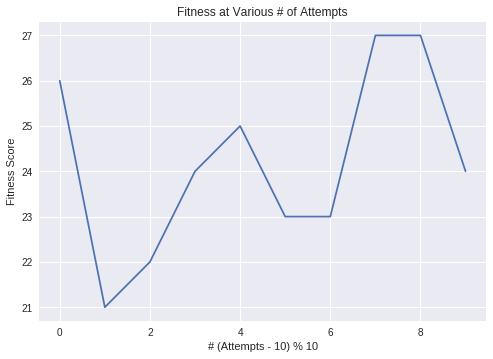

The maximum fitness score of 27.0 is obtained in 80 attempts.


In [50]:
attempts = range(10, 110, 10)

best_score = 0
best_score_index = -1

fit_scores = [0] * len(attempts)

for i, a in enumerate(attempts):
  best_state, best_fitness = mlrose.simulated_annealing(problem, schedule = schedule,
                                                        max_attempts = a, max_iters = 1000,
                                                        init_state = init_state)
#   print('Iteration ', str(i))
#   print('The best state found is: ', best_state)
#   print('The fitness at the best state is: ', best_fitness)
#   print('\n')

  fit_scores[i] = best_fitness

  if best_fitness > best_score:
    best_score = best_fitness
    best_score_index = (i + 1) * 10

plt.plot(fit_scores)

plt.title("Fitness at Various # of Attempts")
plt.xlabel("# (Attempts - 10) % 10")
plt.ylabel("Fitness Score")
plt.show()

print('The maximum fitness score of ' + str(best_score) + ' is obtained in ' + str(best_score_index) + ' attempts.')

Using these values for our parameters, we can now observe the effect that modifying  $\texttt{max_iter}$ has on our fitness score.

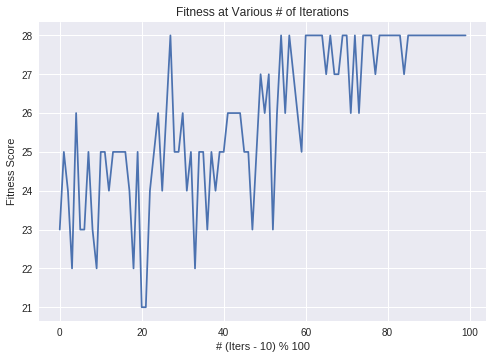

The maximum fitness score of 28.0 is obtained in 2710 attempts.


In [55]:
iters = range(10, 10000, 100)

def tune_iters(iters, best_score_index):
  best_score = 0
  best_score_ind = -1
  
  fit_scores = [0] * len(iters)

  for i, a in enumerate(iters):
    best_state, best_fitness = mlrose.simulated_annealing(problem, schedule = schedule,
                                                          max_attempts = best_score_index, max_iters = a,
                                                          init_state = init_state)
  #   print('Iteration ', str(i))
  #   print('The best state found is: ', best_state)
  #   print('The fitness at the best state is: ', best_fitness)
  #   print('\n')

    fit_scores[i] = best_fitness
    
    if best_fitness > best_score:
      best_score = best_fitness
      best_score_ind = i * 100 + 10

  plt.plot(fit_scores)

  plt.title("Fitness at Various # of Iterations")
  plt.xlabel("# (Iters - 10) % 100")
  plt.ylabel("Fitness Score")
  plt.show()
  
  print('The maximum fitness score of ' + str(best_score) + ' is obtained in ' + str(best_score_ind) + ' attempts.')
  
  return fit_scores
  
tune_iters(iters, best_score_index)

Now, as we've been working with only $8$ queens, let's see how well this search technique generalizes for the $N$-Queens problem. We'll test values of $N$ up to $25$ queens.